In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import sklearn

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Import Data

In [3]:
hr = pd.read_csv('hr_data.csv')

In [4]:
hr.shape

(14999, 9)

In [5]:
hr.size

134991

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
s_hr = pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [10]:
s_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


### Join Both Data

In [11]:
hr = hr.set_index('employee_id').join(s_hr.set_index('EMPLOYEE #'))

In [12]:
hr = hr.reset_index()

In [13]:
hr

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [14]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [15]:
hr[hr.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [16]:
hr.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Fill Null Value

In [17]:
hr.fillna(hr.mean(), inplace=True)

In [18]:
hr[hr.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [19]:
hr.drop('employee_id', axis=1, inplace=True)

In [20]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         14999 non-null  int64  
 1   average_montly_hours   14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   Work_accident          14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   satisfaction_level     14999 non-null  float64
 9   last_evaluation        14999 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
hr.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [22]:
hr.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [23]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [24]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [25]:
employee_condition = ['Employee will stay','employee will leave']

### Check Corr between Data

In [26]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

No handles with labels found to put in legend.


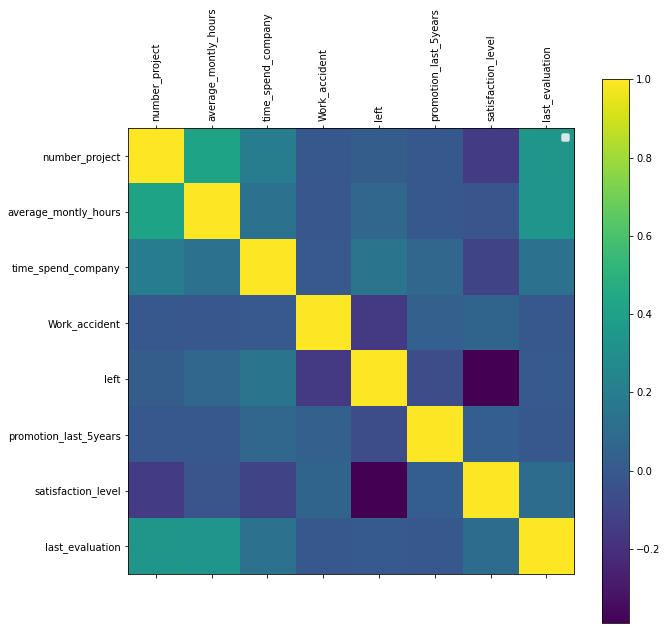

In [27]:
plot_corr(hr)

In [28]:
hr.corr()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815
satisfaction_level,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783
last_evaluation,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000


### Data Visulization

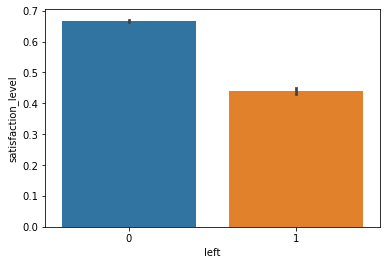

In [29]:
sns.barplot(x='left', y='satisfaction_level', data=hr)

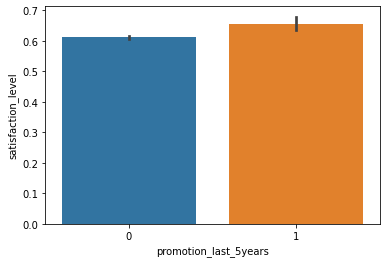

In [30]:
sns.barplot(x='promotion_last_5years', y='satisfaction_level', data=hr)

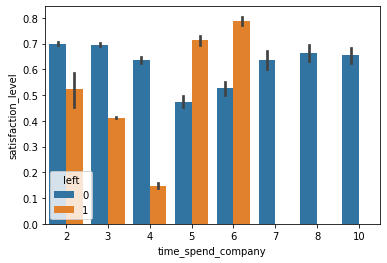

In [31]:
sns.barplot(x='time_spend_company', y='satisfaction_level', data=hr, hue='left')

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



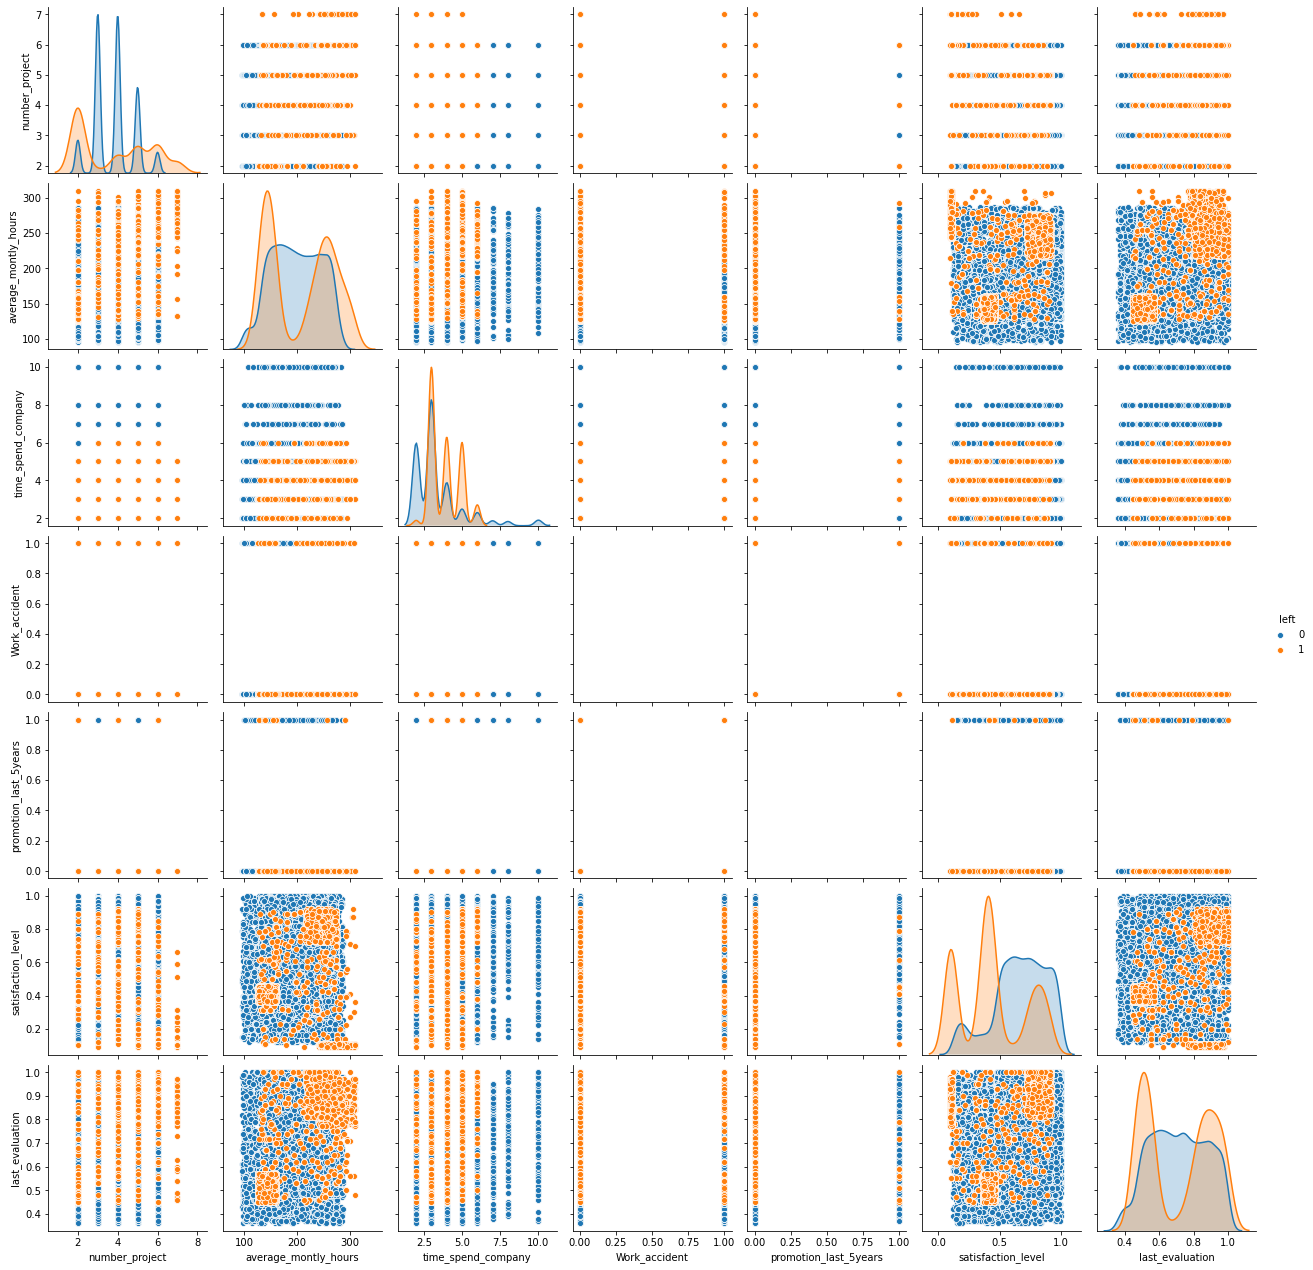

In [32]:
sns.pairplot(hr, hue='left')

In [33]:
y = hr[['department','salary']]

### Convert Data String into number

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_le = le.fit_transform(hr['salary'])

In [35]:
y_le

array([1, 2, 2, ..., 1, 1, 1])

In [36]:
hr['salary_num'] = y_le

In [37]:
Salary = ['high','low','medium']

In [38]:
hr.drop('salary', axis=1, inplace=True)

In [39]:
dep = LabelEncoder()
dep_num = dep.fit_transform(hr['department'])

In [40]:
dep_num

array([7, 7, 7, ..., 8, 8, 8])

In [41]:
hr['department_num'] = dep_num

In [42]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [43]:
Department = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']

In [44]:
hr.loc[hr['department_num']== 5].head(1)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num,department_num
77,2,137,3,0,1,0,marketing,0.4,0.54,2,5


In [45]:
hr.drop('department', axis=1, inplace=True)

In [46]:
x = hr.drop('left', axis=1)

In [47]:
y = hr['left']

### Train test split

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
pred_dt = dt.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, pred_dt)*100

97.28888888888889

### KNN

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler().fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [56]:
pred_knn = knn.predict(x_test_std)

In [57]:
accuracy_score(y_test, pred_knn)*100

96.17777777777778

### Choose Best n_neighbors value

In [58]:
scores = {}
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_std, y_train)
    pred_knn = knn.predict(x_test_std)
    scores[i] = accuracy_score(y_test, pred_knn)*100

In [59]:
scores

{1: 96.6,
 2: 96.17777777777778,
 3: 95.51111111111112,
 4: 95.26666666666667,
 5: 95.15555555555557,
 6: 95.31111111111112,
 7: 94.93333333333334,
 8: 95.15555555555557,
 9: 94.88888888888889,
 10: 94.91111111111111,
 11: 94.68888888888888,
 12: 94.71111111111111,
 13: 94.46666666666667,
 14: 94.6,
 15: 94.4888888888889,
 16: 94.6,
 17: 94.35555555555555,
 18: 94.35555555555555,
 19: 94.22222222222221,
 20: 94.28888888888889,
 21: 94.13333333333334,
 22: 94.11111111111111,
 23: 94.04444444444444,
 24: 94.08888888888889,
 25: 93.95555555555556}